In [1]:
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

Download and transform train dataset.

In [2]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('data', train=True, download=True,
                            transform=transform)
dataset2 = datasets.MNIST('data', train=False,
                            transform=transform)

device = torch.device("cpu")

100%|██████████| 9912422/9912422 [00:05<00:00, 1700260.34it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 276707.66it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:01<00:00, 935371.82it/s] 


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16769831.66it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Grouping MNIST images w.r.t. their labels.

In [3]:
digit_groups_train = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
digit_groups_test = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

for i in range(len(dataset1)): 
    digit_groups_train[int(dataset1.targets[i])].append(i)
for i in range(len(dataset2)): 
    digit_groups_test[int(dataset2.targets[i])].append(i)

For example, let's make the `MNIST Sum` dataset. Each example contains two images, and the label is the sum of the numbers in the two images.

In [4]:
class MNIST_Sum:
    def __init__(self, num, digit_groups):
        self.targets = [] # the final outputs, i.e., sum of the digits in images
        self.img_indices = [] # the indices of images in the original MNIST dataset
        self.ground_truth = [] # ground truth label (digit) for each image
        self.length = num # number of this dataset
        for i in range(num):
            # sampling two numbers from 0 to 9
            sampled_digits = np.random.choice(10, 2)
            self.ground_truth.append(list(sampled_digits))

            # using the sum of the sampled digits as the target
            self.targets.append(sum(sampled_digits))
            ids = []
            for j in range(len(sampled_digits)):
                # get the j-th digits
                digit = sampled_digits[j]
                # total number of the images of the digit
                ids.append(np.random.choice(digit_groups[digit]))
            self.img_indices.append(ids)

Generate the training and test data.

In [5]:
# Generate the training and test dataset for MNIST Sum task
mnist_sum_data_train = MNIST_Sum(100, digit_groups_train)
mnist_sum_data_test = MNIST_Sum(100, digit_groups_test)

Have a look at the generated dataset.

Showing example No. 28
The sum of these images are 11
The labels of these images are [2, 9]


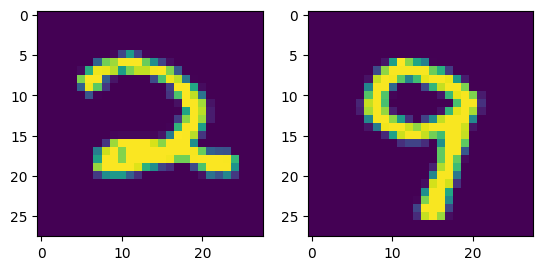

In [6]:
# Sample an example
idx = np.random.choice(mnist_sum_data_train.length)
print("Showing example No.", idx)

# Get the indices of the images in the example
img_id_0 = mnist_sum_data_train.img_indices[idx][0]
img_id_1 = mnist_sum_data_train.img_indices[idx][1]

# Plot them
_, axs = plt.subplots(1,2)
axs[0].imshow(dataset1.data[img_id_0, :, :])
axs[1].imshow(dataset1.data[img_id_1, :, :])

# Print
print("The sum of these images are", mnist_sum_data_train.targets[idx])
print("The labels of these images are", mnist_sum_data_train.ground_truth[idx])